# Exercise 09:  Pivot Tables
<font color = magenta>Jessica Reyes<font>

In [1]:
import pandas as pd

### Birthrate Data

In this exercise we will take a look at data on births in the United States, provided by the CDC.
This dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/).

In [2]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

Taking a look at the data, we see that it's relatively simple–it contains the number of male and female births per month from 1969 to 2008:

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Generate a table of the total number of births per year by gender.
Plot the resulting data to see trends of male vs female births.

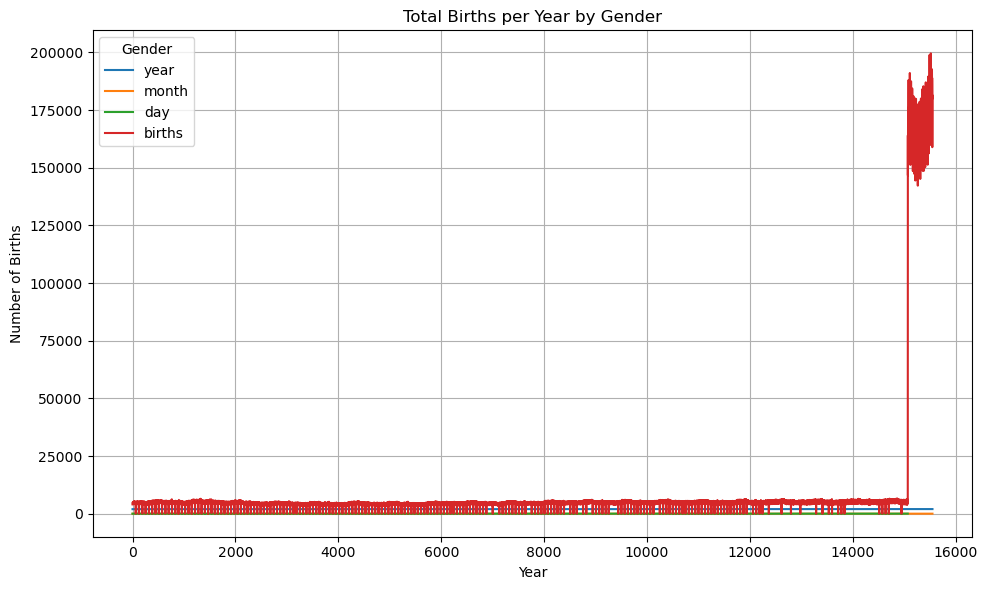

In [6]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

import matplotlib.pyplot as plt

# Plot the trends
births.plot(title='Total Births per Year by Gender', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

The yearly dataset might be a little noisy, so let's take a look at the number of births per decade, which will give us a broader view.
To do so, add another column to the DataFrame which contains the decade and construct a pivot table that will provide the total number of births per decade for both males and females.

To help you create the decade information consider the operation
```Python
(x // 10) * 10
```

In [5]:
per_decade = births.assign(decade=births['year'] // 10 * 10)
per_decade.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


### More pivot tables

For the next exercise, we will use the following toy DataFrame:

In [6]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


The following pivot table operation does not specify the value on which to operate.  What did the pivot operation do in this case?  Consult the documentation of [pd.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) to determine that.  (Hint:  look at the help for the `values` parameter).

In [7]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


*When values is specified, the values from 'baz' column will fill in the table.* 

The following is a variant of what you just analyzed.  What is pandas doing in this case?

In [6]:
df.pivot(index='foo', columns='bar')

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

*If values is not specified, all remaining columns other than index/column choices are used as the values, and the result will be a multi-level column index.*